### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [1]:
!python build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph

### Afficher le graphe: 

Figure(640x480)


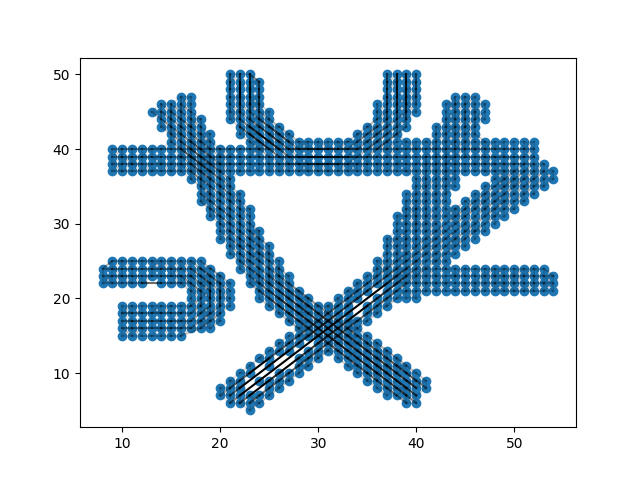

In [2]:
from IPython.display import Image, display  # type: ignore
!python draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))


### Filtrer le graphe pour avoir uniquement les noeuds fortement connectés:

In [3]:
!python build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph --threshold 0.4


Figure(640x480)


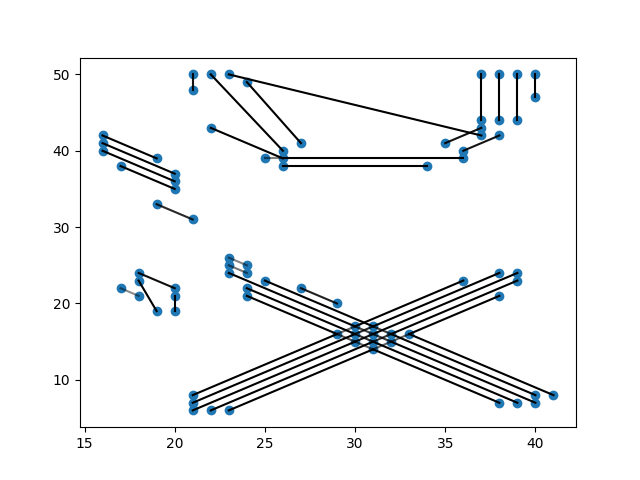

In [4]:
!python draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))

### Créer une matrice d'adjacence aléatoire:

In [5]:
!python build_random_adj_matrix.py 5 6 True rand_graph

4
6


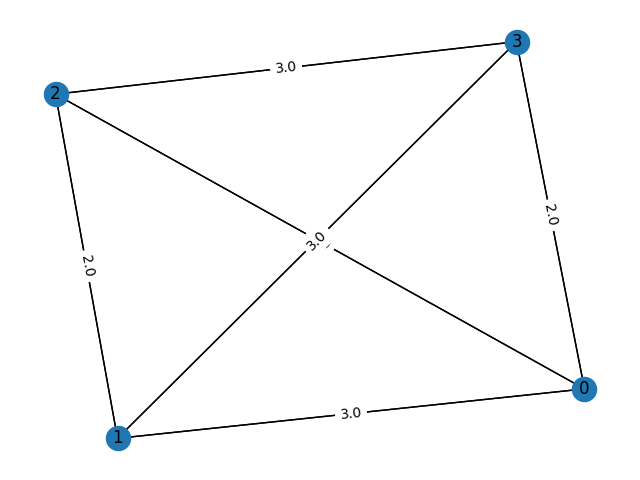

In [6]:
!python draw_random_adj_matrix.py rand_graph rand_graph_visu
display(Image(filename='rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [7]:
import sys

sys.path.append("C:\\Users\\harsh\\quactography")
!python find_max_intensity_diffusion_path.py rand_graph 1 0 qaoa_solver_infos --alphas 1 2 3  --reps 1  -npr 2

Traceback (most recent call last):
  File "c:\Users\harsh\quactography\scripts\find_max_intensity_diffusion_path.py", line 6, in <module>
    from solver.qaoa_multiprocess_solver import multiprocess_qaoa_solver
ModuleNotFoundError: No module named 'solver'


### Visualiser les chemins qui maximise la valeur absolue des poids:

In [8]:
!python plot_distribution_probabilities.py qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz visu_total_dist visu_selected_dist
display(Image(filename='visu_selected_dist_1.png'))
display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

Traceback (most recent call last):
  File "c:\Users\harsh\quactography\scripts\plot_distribution_probabilities.py", line 40, in <module>
    main()
  File "c:\Users\harsh\quactography\scripts\plot_distribution_probabilities.py", line 32, in main
    plot_distribution_of_probabilities(
  File "c:\users\harsh\quactography\quactography\visu\dist_prob.py", line 12, in plot_distribution_of_probabilities
    _, dist_binary_prob, min_cost, h, _, _ = load_optimization_results(in_file)
  File "c:\users\harsh\quactography\quactography\solver\io.py", line 19, in load_optimization_results
    data = np.load(in_file, allow_pickle=True)
  File "c:\Users\harsh\.virtualenv\quactography\lib\site-packages\numpy\lib\npyio.py", line 427, in load
    fid = stack.enter_context(open(os_fspath(file), "rb"))
FileNotFoundError: [Errno 2] No such file or directory: 'qaoa_solver_infos_alpha_1.npz'


FileNotFoundError: [Errno 2] No such file or directory: 'visu_selected_dist_1.png'

### Visualiser les chemins optimaux:

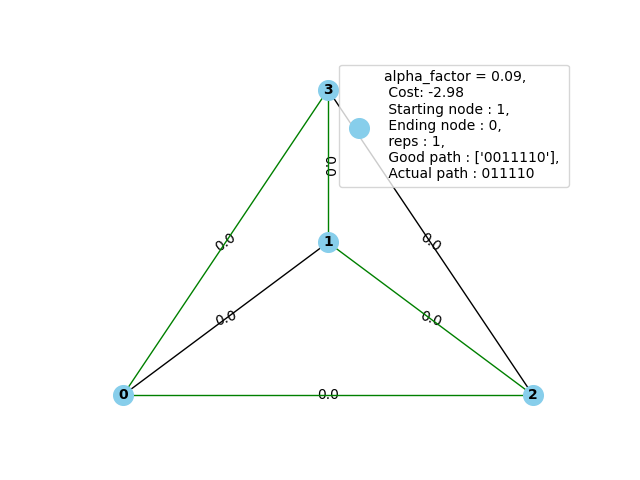

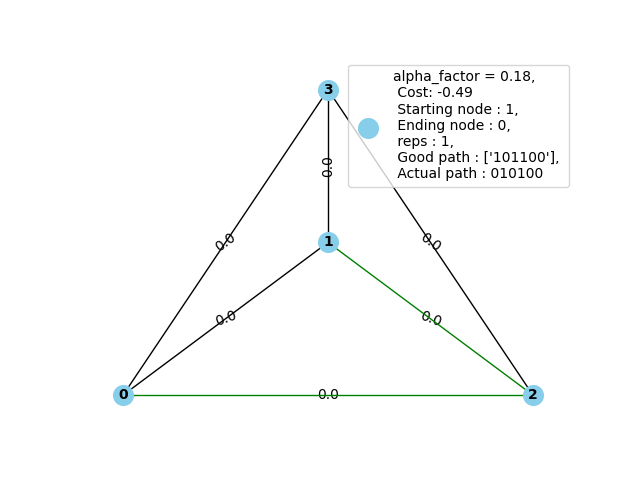

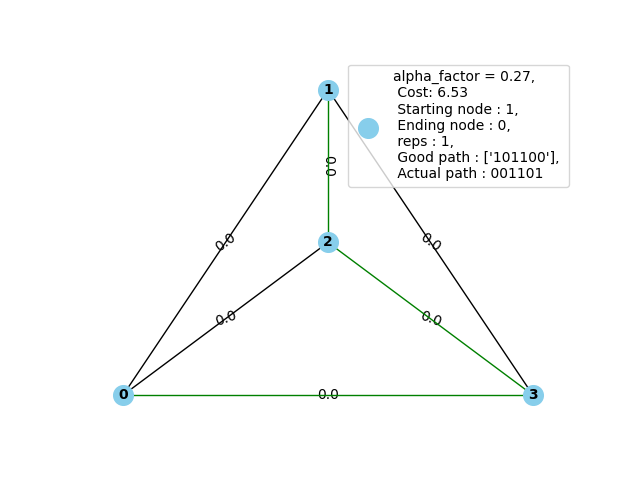

In [ ]:
!python plot_optimal_paths.py graph qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz opt_paths
display(Image(filename='opt_paths_0_alpha_1.00.png'))
display(Image(filename='opt_paths_1_alpha_2.00.png'))
display(Image(filename='opt_paths_2_alpha_3.00.png'))

In [1]:
import nibabel as nib
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

data= (np.load("qaoa_solver_infos_alpha_3.npz"))

print(data.files)
a = (data['dist'])
a


['dist', 'dist_binary_probabilities', 'min_cost', 'hamiltonian', 'opt_bin_str', 'reps']


array({0: 0.01108, 1: 0.012434, 2: 0.016683, 3: 0.016369, 4: 0.008609, 5: 0.001318, 6: 0.003926, 7: 0.003811, 8: 0.010737, 9: 0.019733, 10: 0.004472, 11: 0.023899, 12: 5.7e-05, 13: 0.015223, 14: 0.01579, 15: 0.001488, 16: 0.002317, 17: 0.003285, 18: 0.006086, 19: 0.001494, 20: 0.024194, 21: 0.022055, 22: 0.006728, 23: 0.004034, 24: 0.005494, 25: 0.001857, 26: 0.001718, 27: 0.014162, 28: 0.009206, 29: 0.018574, 30: 0.015571, 31: 0.001301, 32: 0.000411, 33: 0.019306, 34: 0.020558, 35: 0.010892, 36: 0.039996, 37: 0.030136, 38: 0.022036, 39: 0.007427, 40: 0.017083, 41: 0.067245, 42: 0.006925, 43: 0.043145, 44: 0.014973, 45: 0.069164, 46: 0.017336, 47: 0.00759, 48: 0.009014, 49: 0.012526, 50: 0.032958, 51: 0.028837, 52: 0.034266, 53: 0.01078, 54: 0.040953, 55: 0.003454, 56: 0.001943, 57: 0.035704, 58: 0.028708, 59: 0.01269, 60: 0.022038, 61: 0.010994, 62: 0.005034, 63: 0.012173},
      dtype=object)

In [5]:
a

array({0: 0.01108, 1: 0.012434, 2: 0.016683, 3: 0.016369, 4: 0.008609, 5: 0.001318, 6: 0.003926, 7: 0.003811, 8: 0.010737, 9: 0.019733, 10: 0.004472, 11: 0.023899, 12: 5.7e-05, 13: 0.015223, 14: 0.01579, 15: 0.001488, 16: 0.002317, 17: 0.003285, 18: 0.006086, 19: 0.001494, 20: 0.024194, 21: 0.022055, 22: 0.006728, 23: 0.004034, 24: 0.005494, 25: 0.001857, 26: 0.001718, 27: 0.014162, 28: 0.009206, 29: 0.018574, 30: 0.015571, 31: 0.001301, 32: 0.000411, 33: 0.019306, 34: 0.020558, 35: 0.010892, 36: 0.039996, 37: 0.030136, 38: 0.022036, 39: 0.007427, 40: 0.017083, 41: 0.067245, 42: 0.006925, 43: 0.043145, 44: 0.014973, 45: 0.069164, 46: 0.017336, 47: 0.00759, 48: 0.009014, 49: 0.012526, 50: 0.032958, 51: 0.028837, 52: 0.034266, 53: 0.01078, 54: 0.040953, 55: 0.003454, 56: 0.001943, 57: 0.035704, 58: 0.028708, 59: 0.01269, 60: 0.022038, 61: 0.010994, 62: 0.005034, 63: 0.012173},
      dtype=object)

In [11]:
cost= []
for i in range(len(a.all())):
    cost.append(a.all()[i])
    
print(cost)

[0.01108, 0.012434, 0.016683, 0.016369, 0.008609, 0.001318, 0.003926, 0.003811, 0.010737, 0.019733, 0.004472, 0.023899, 5.7e-05, 0.015223, 0.01579, 0.001488, 0.002317, 0.003285, 0.006086, 0.001494, 0.024194, 0.022055, 0.006728, 0.004034, 0.005494, 0.001857, 0.001718, 0.014162, 0.009206, 0.018574, 0.015571, 0.001301, 0.000411, 0.019306, 0.020558, 0.010892, 0.039996, 0.030136, 0.022036, 0.007427, 0.017083, 0.067245, 0.006925, 0.043145, 0.014973, 0.069164, 0.017336, 0.00759, 0.009014, 0.012526, 0.032958, 0.028837, 0.034266, 0.01078, 0.040953, 0.003454, 0.001943, 0.035704, 0.028708, 0.01269, 0.022038, 0.010994, 0.005034, 0.012173]


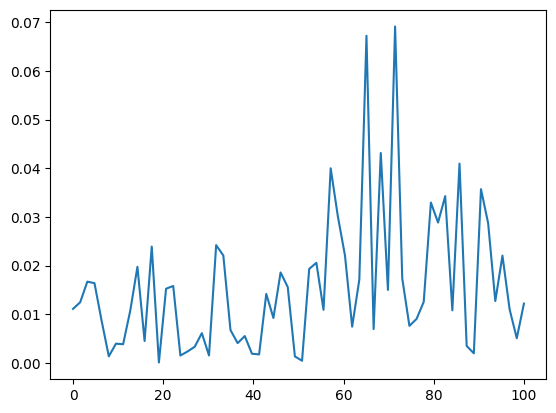

In [16]:
import matplotlib.pyplot as plt
x = np.linspace(0,100,64)
plt.plot(x, cost)